# EDA

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data.columns = data.columns.str.replace(' ','')
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [4]:
np.percentile(data['shares'], [25, 50, 75])

array([ 946., 1400., 2800.])

In [5]:
bins = [0, 1400, 10000, np.inf]
data['category'] = pd.cut(data['shares'], bins, 
                          labels = ['Unpopular', 'Popular', 'Extremely_popular'])
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,category
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [6]:
data.drop(labels=['url', 'timedelta'], axis = 1, inplace=True)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,category
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [7]:
temp_data = data[data['shares'] <= 100000]

In [46]:
def dist_plots(df):
    fig_0 = plt.figure(figsize=(10, 4))
    sns.distplot(df) 
    #sns.color_palette("vlag")
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
    
    return fig_0

/Users/chenyiqiu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


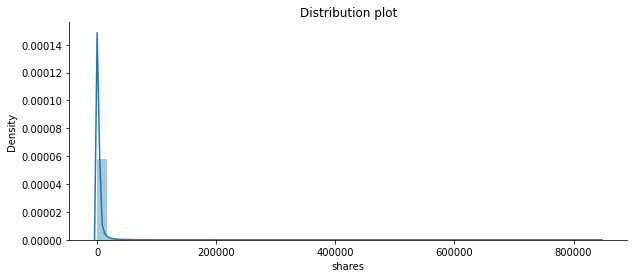

In [47]:
temp = temp_data['shares']
fig_0 = dist_plots(temp)

In [48]:
fig_0.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/distplot', transparent=True)

1400.0


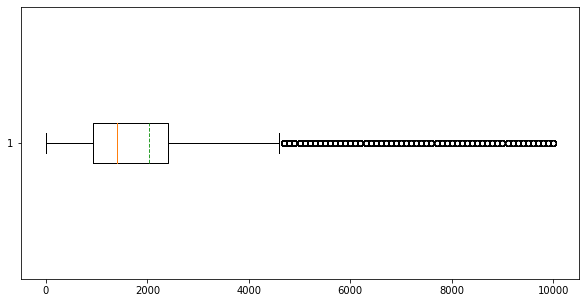

In [10]:
temp_data = data[data['shares'] <= 10000]
plt.figure(figsize=(10, 5))
plt.boxplot(temp_data['shares'], showmeans=True, meanline=True,vert = False)
print(temp_data['shares'].median())

1300.0
1400.0
1400.0


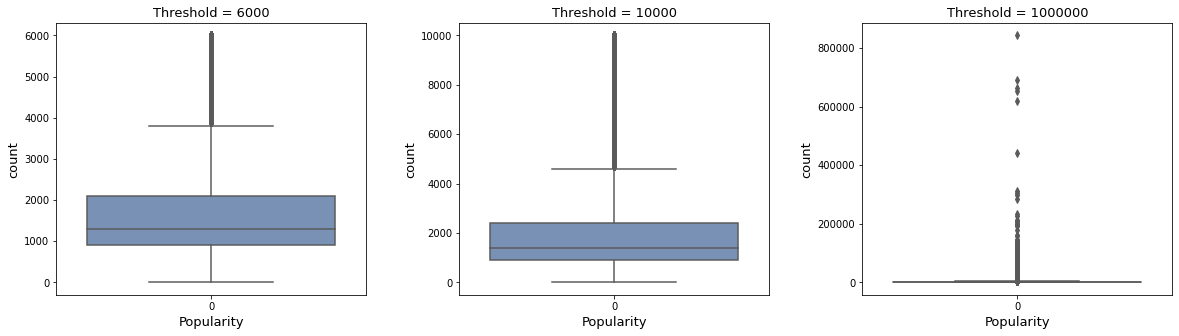

In [11]:
threshold = [6000, 10000, 1000000]

fig = plt.figure(figsize=(20,5))
grid = plt.GridSpec(nrows=1,ncols=3,wspace=0.3,hspace=0.3)

for i in range(3):
    
    temp_data = data[data['shares'] <= threshold[i]]
    plt.subplot(grid[0,i])
    ax1 = sns.boxplot(data = temp_data['shares'], orient = 'v', palette = sns.color_palette("vlag"))
    ax1.set_ylabel('count' ,fontsize=13)
    ax1.set_xlabel('Popularity',fontsize=13)
    ax1.set_title('Threshold = '+ str(threshold[i]), fontsize=13)
    print(temp_data['shares'].median())

In [42]:
fig.savefig('figures/fig', transparent=True)

## Countplot for 3 categories

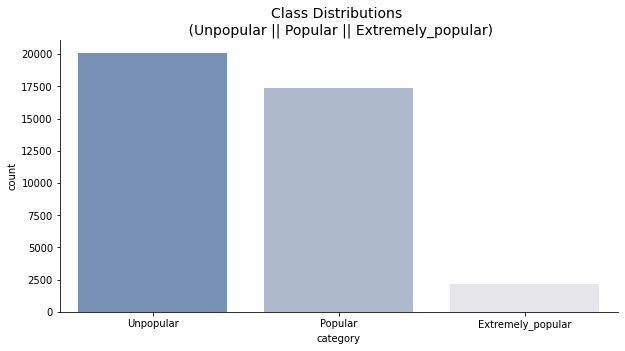

In [40]:
fig00 = plt.figure(figsize = (10,5))
sns.countplot(x = data['category'], palette = sns.color_palette("vlag"))
plt.title('Class Distributions \n (Unpopular || Popular || Extremely_popular)', fontsize=14)
sns.despine()
plt.show()

In [41]:
fig00.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig00', transparent=True)

# Correlation matrix

<AxesSubplot:>

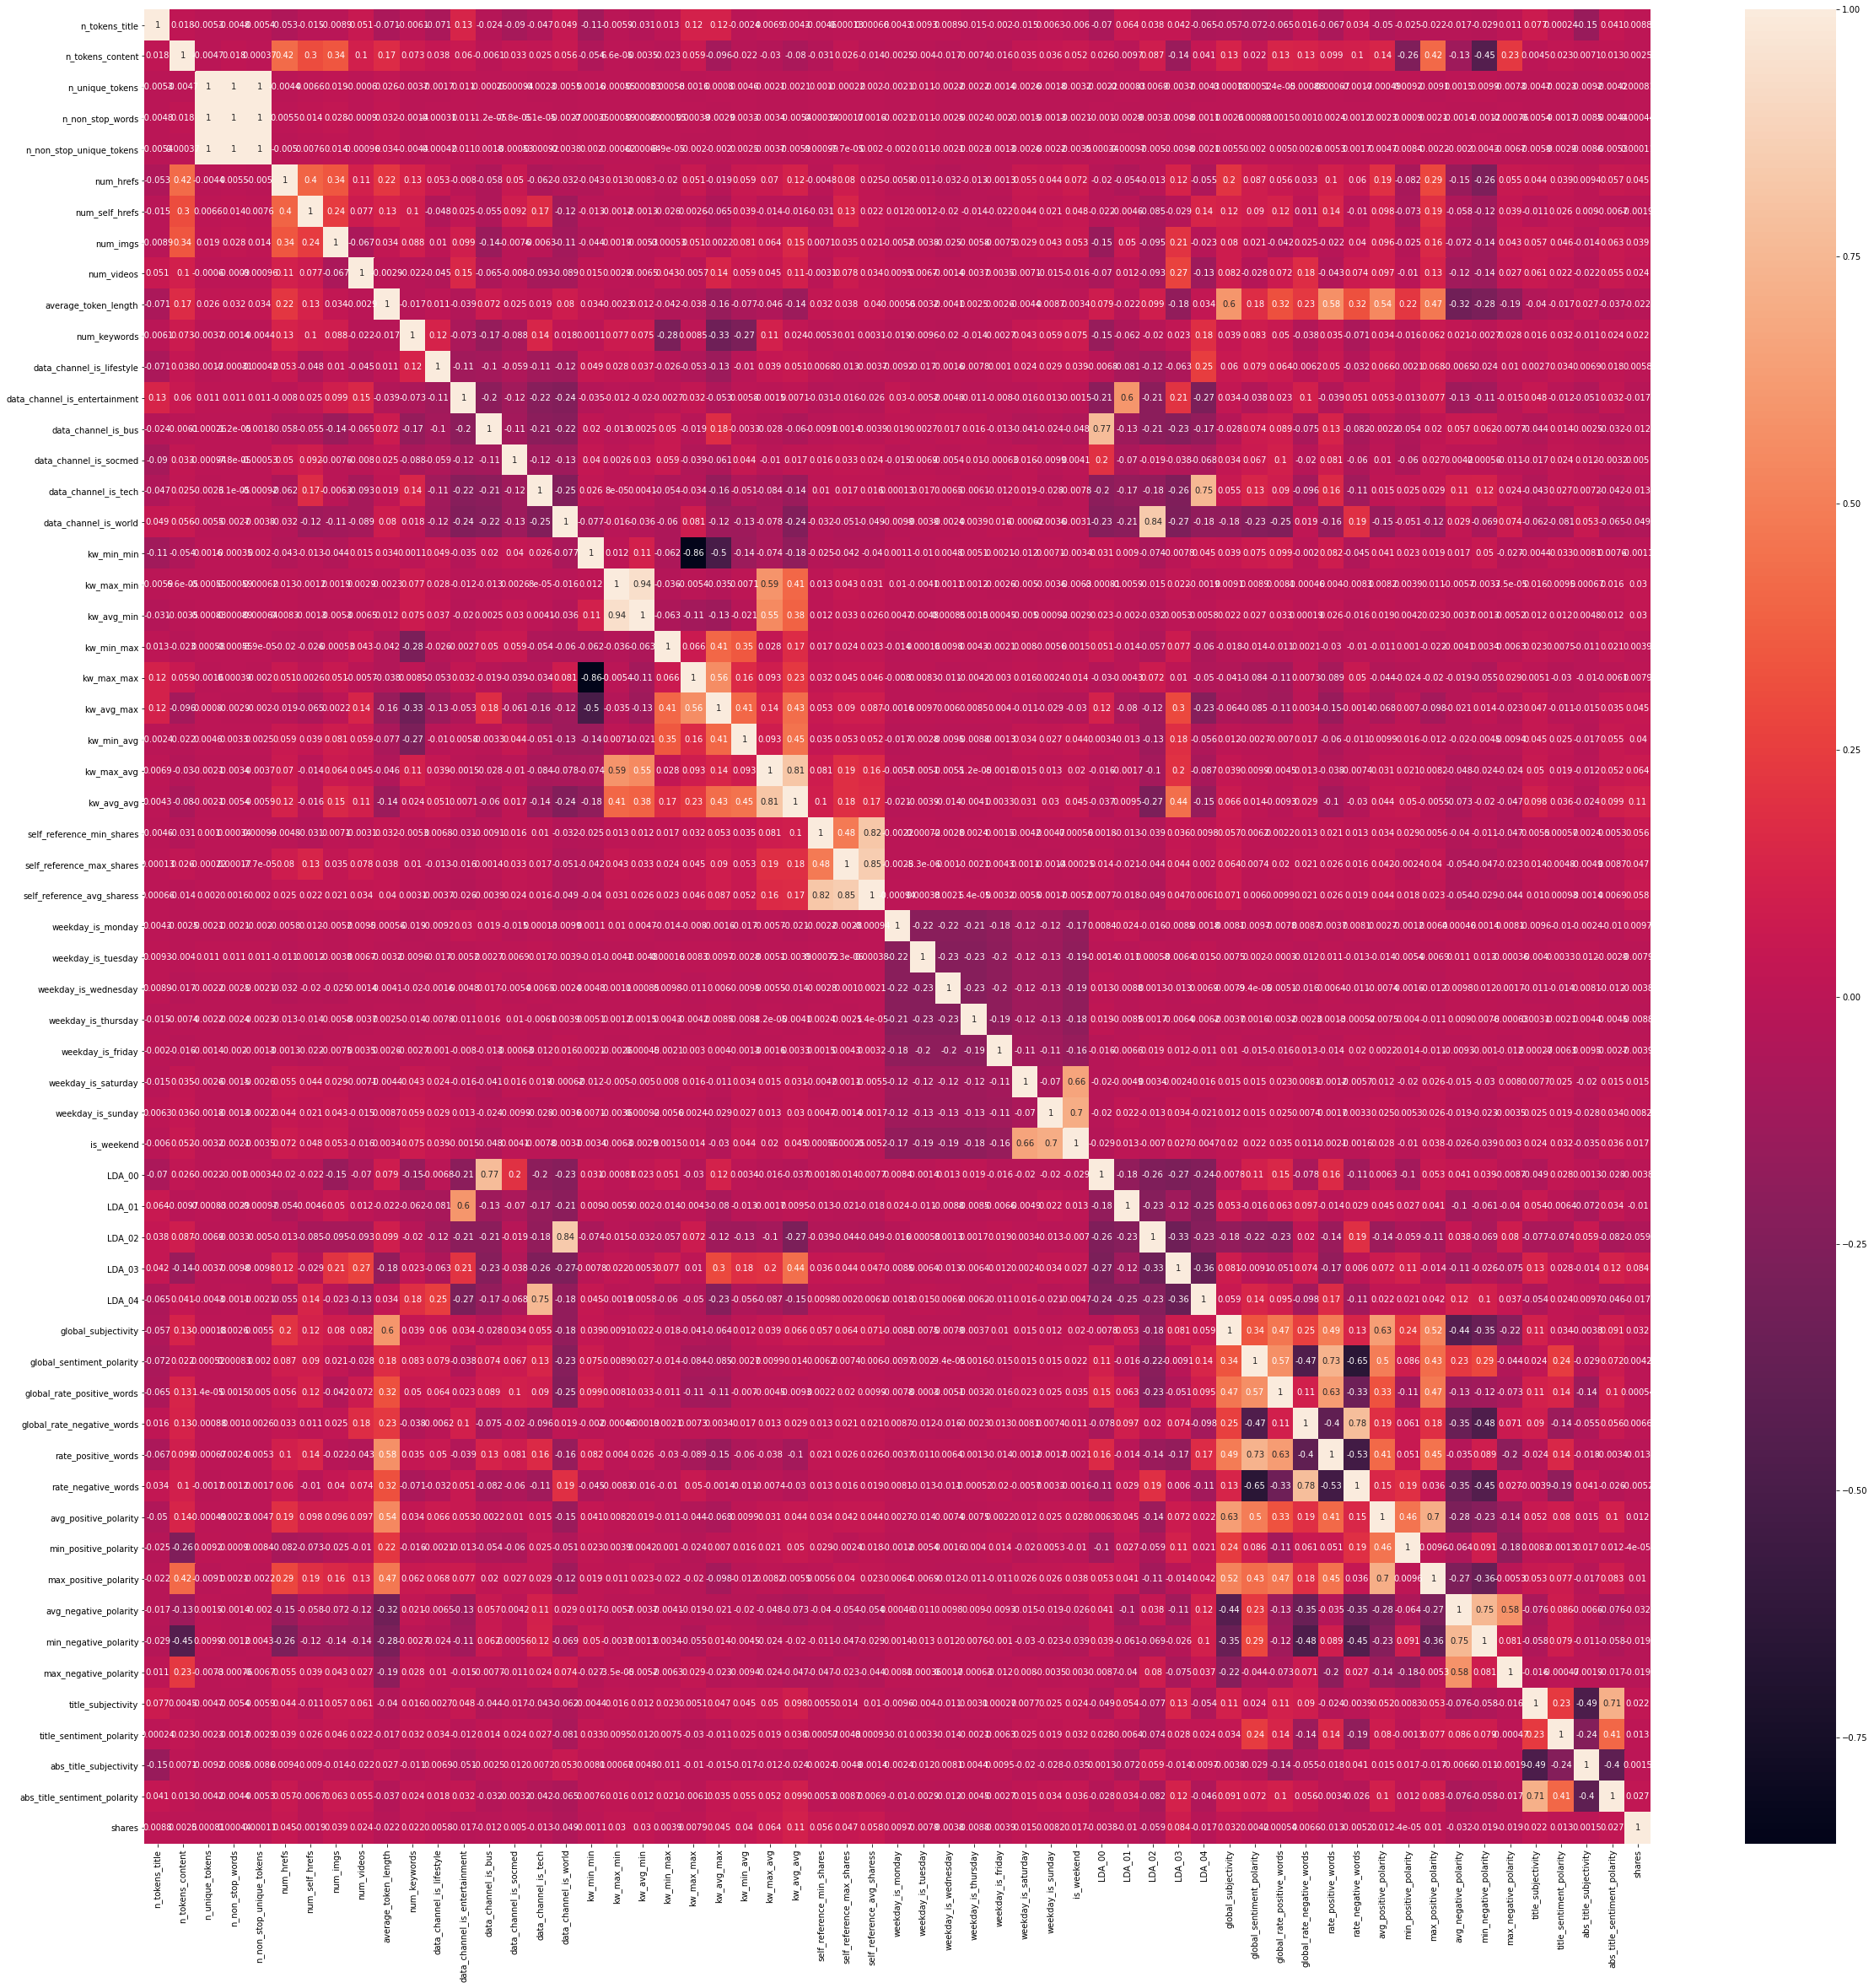

In [68]:
plt.figure(figsize=(40,40))
sns.heatmap(data=data.corr(),annot=True)

<AxesSubplot:>

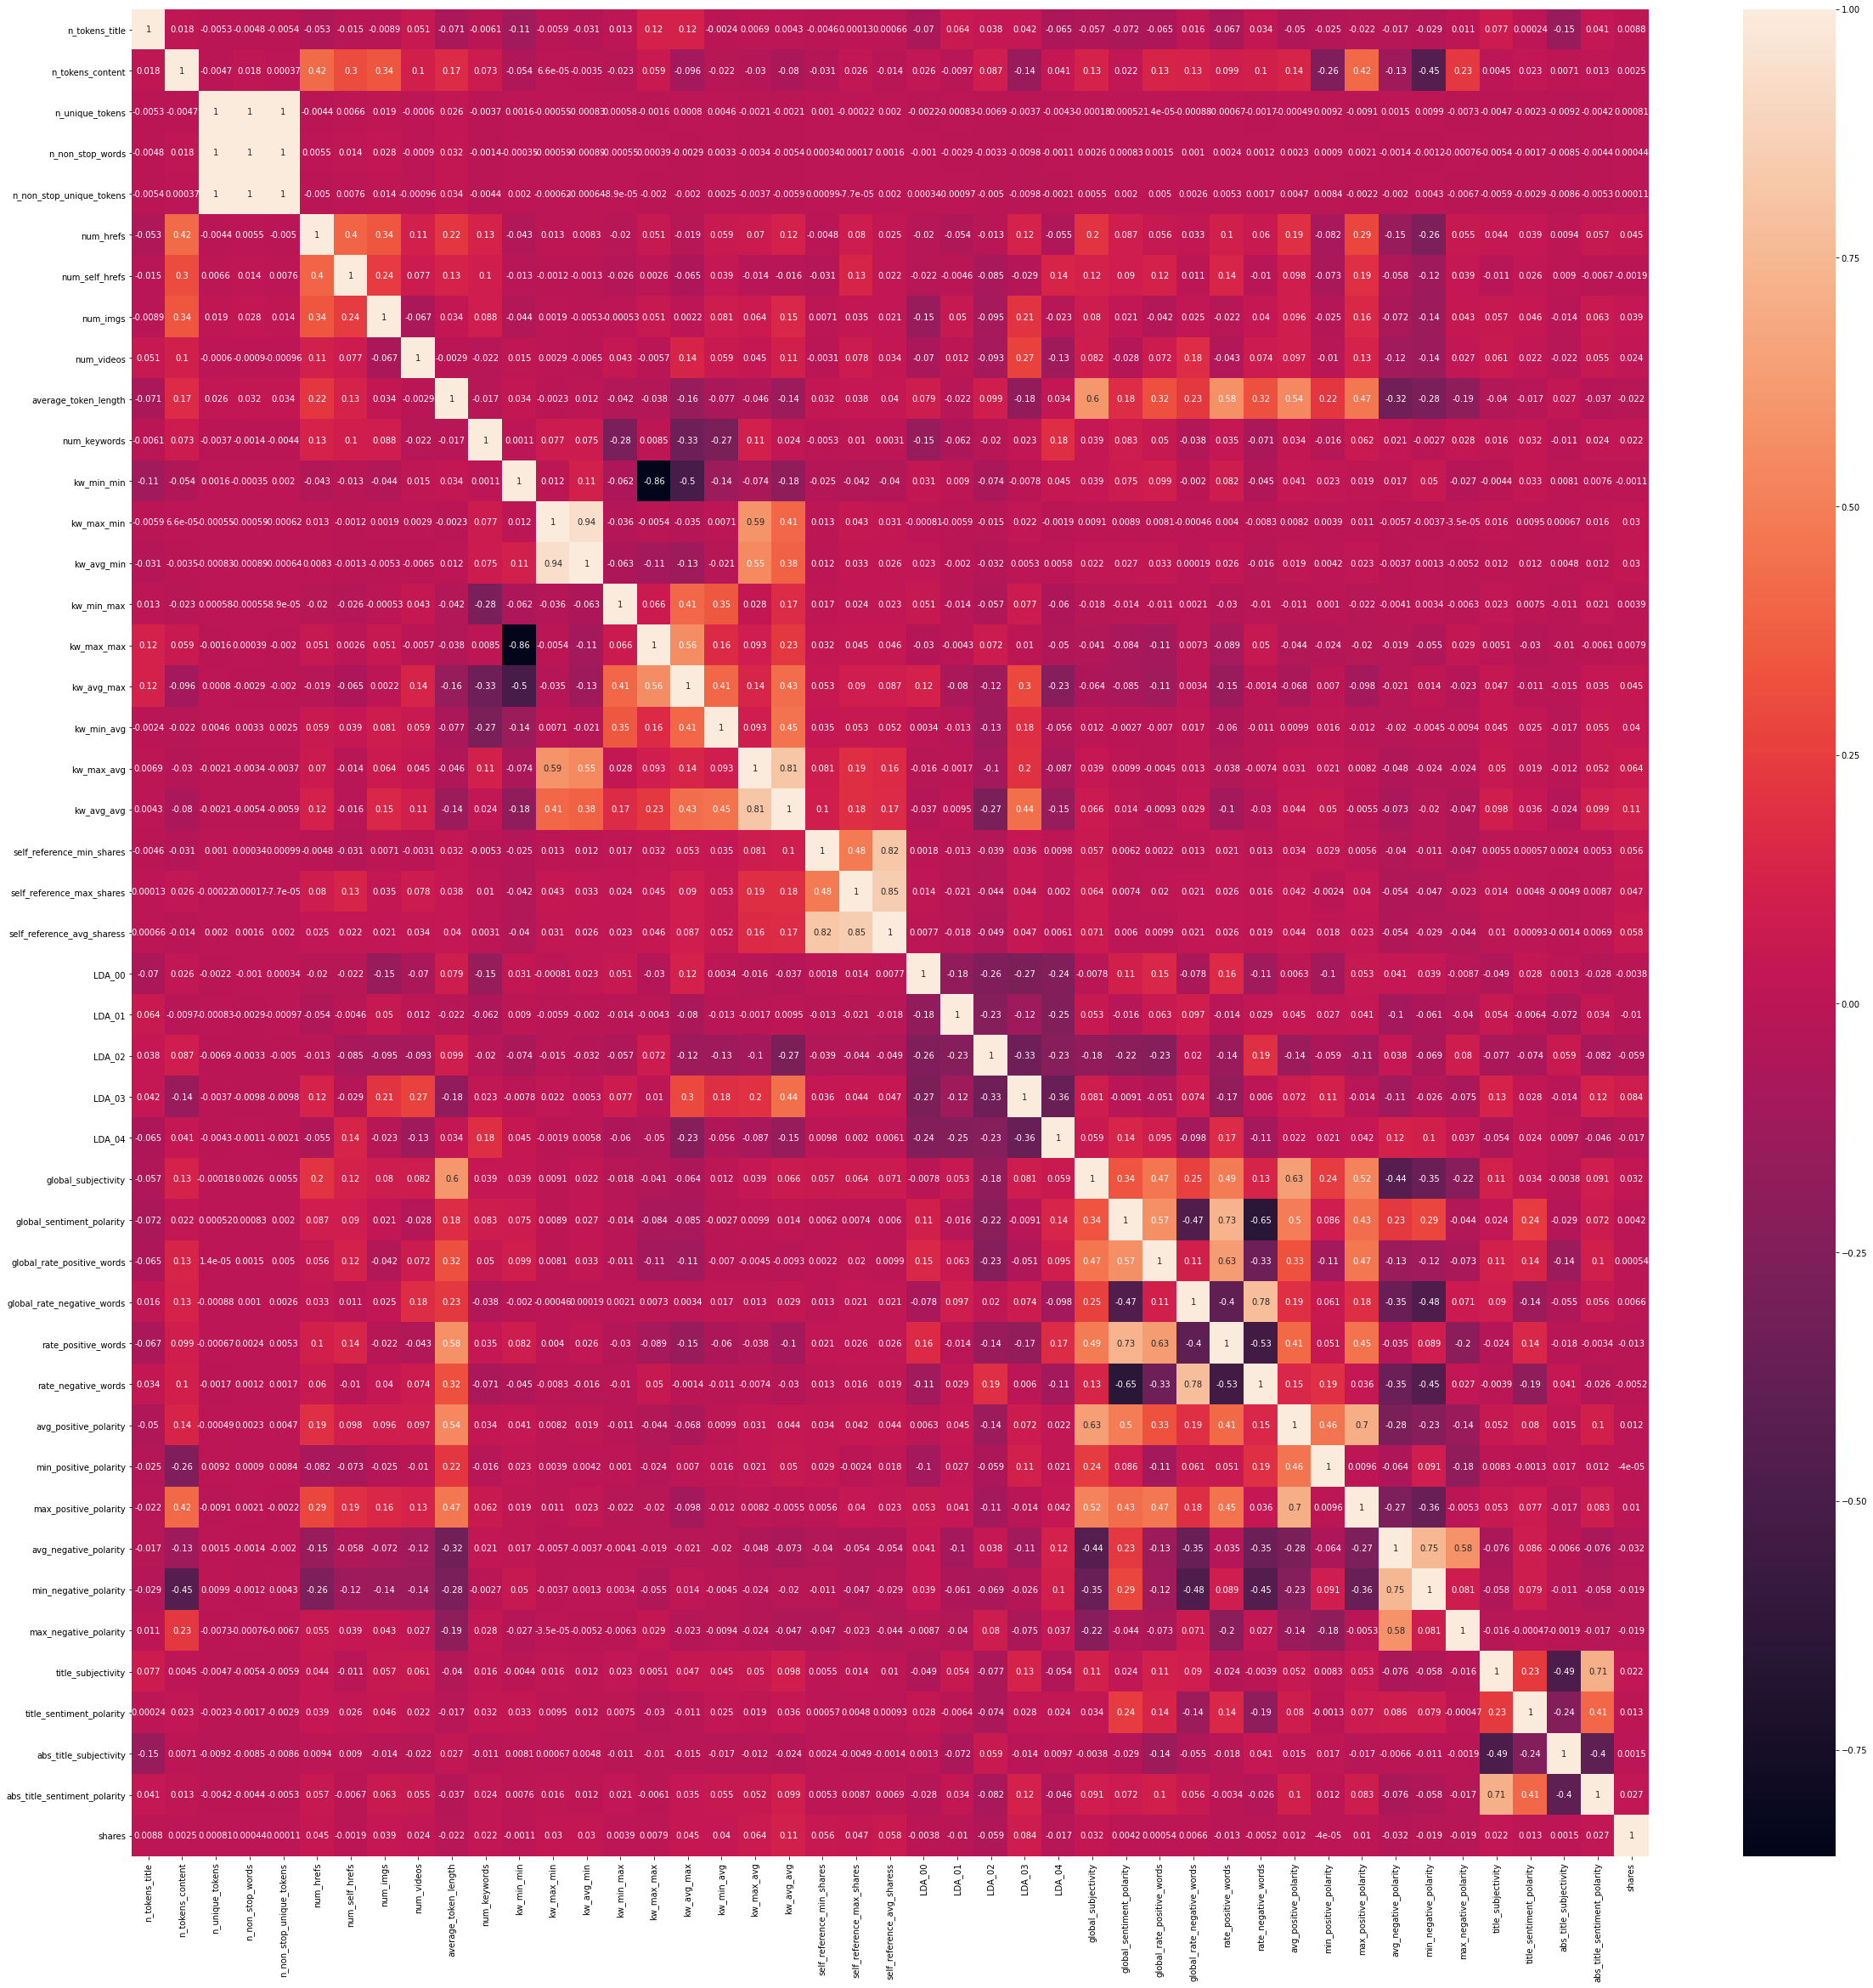

In [186]:
plt.figure(figsize=(40,40))
sns.heatmap(data=numeric.corr(),annot=True)

## Numerical & categorical attributes

In [13]:
numeric = data.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

In [14]:
numeric.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'ca

In [15]:
numeric.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,category
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [16]:
categorical = data[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [17]:
categorical.head()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Numerical

In [21]:
def visualize_numeric(dataset):
    fig = plt.figure(figsize=(20,5))
    grid = plt.GridSpec(nrows=1,ncols=len(dataset),wspace=0.3,hspace=0.3)

    for i in range(len(dataset)):
        a = i//2
        b = i%2
        plt.subplot(grid[0,i])
        ax1 = sns.boxplot(x = 'category', y = dataset[i], data = data, orient = 'v', palette = sns.color_palette("vlag"))
        ax1.set_ylabel(dataset[i],fontsize=13)
        ax1.set_xlabel('Popularity',fontsize=13)
        #plt.xticks(rotation=30)
        ax1.set_title(dataset[i], fontsize=13)
    
    return fig
        
#fig.savefig('', transparent=True)
        

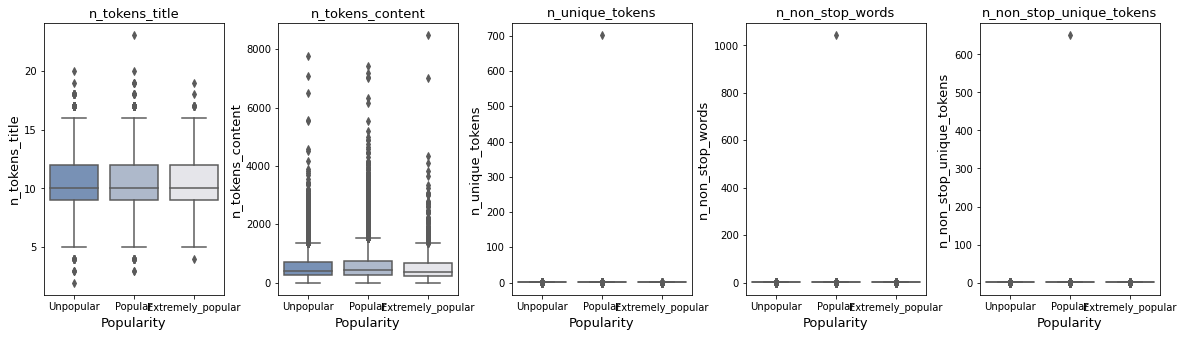

In [22]:
words = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']

fig1 = visualize_numeric(words)   
    


In [27]:
fig1.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig1', transparent=True)

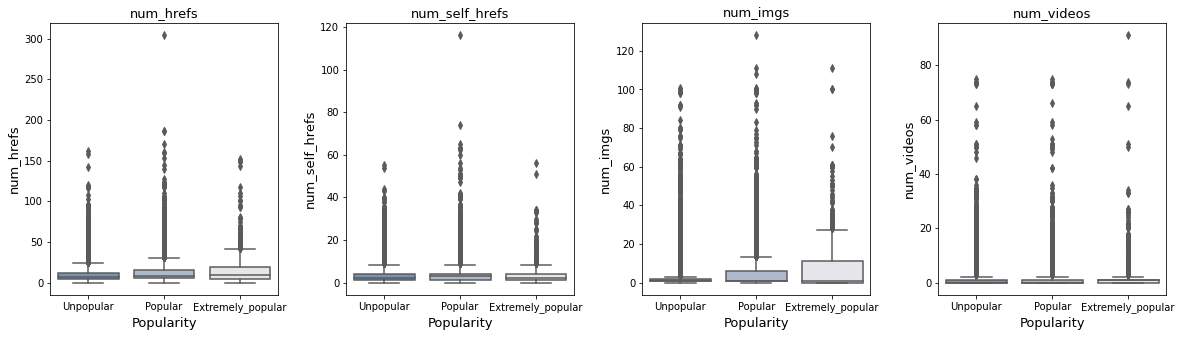

In [25]:
links_media = ['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos']

fig2 = visualize_numeric(links_media)   
    

In [28]:
fig2.savefig('figures/fig2', transparent=True)

In [29]:
keywords_1 = ['average_token_length','num_keywords']
keywords_2 = [ 'kw_min_min', 'kw_max_min', 'kw_avg_min']
keywords_3 = ['kw_min_max','kw_max_max', 'kw_avg_max', 'kw_min_avg']
keywords_4 = ['kw_max_avg', 'kw_avg_avg']

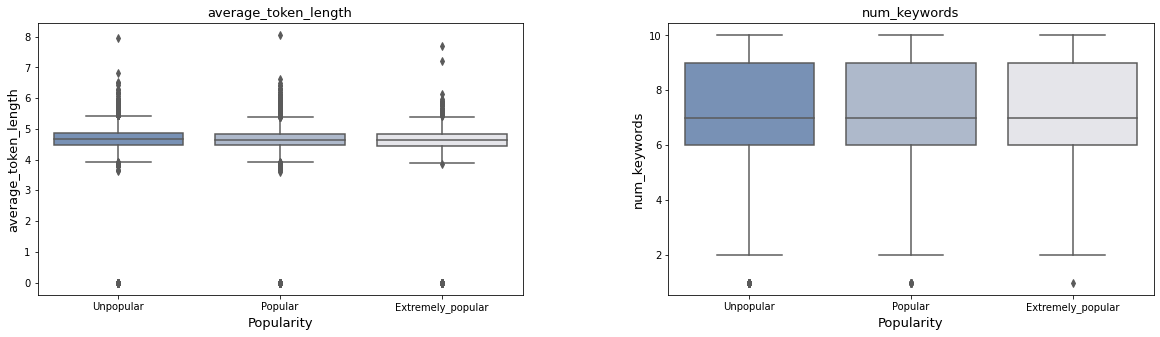

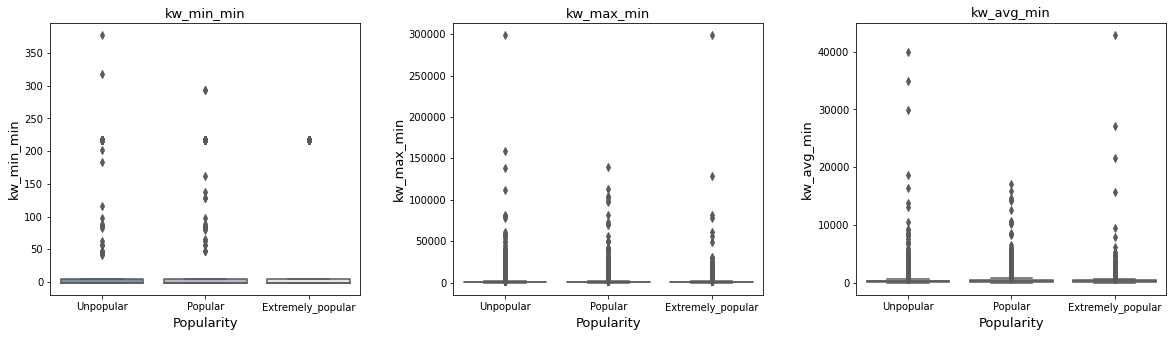

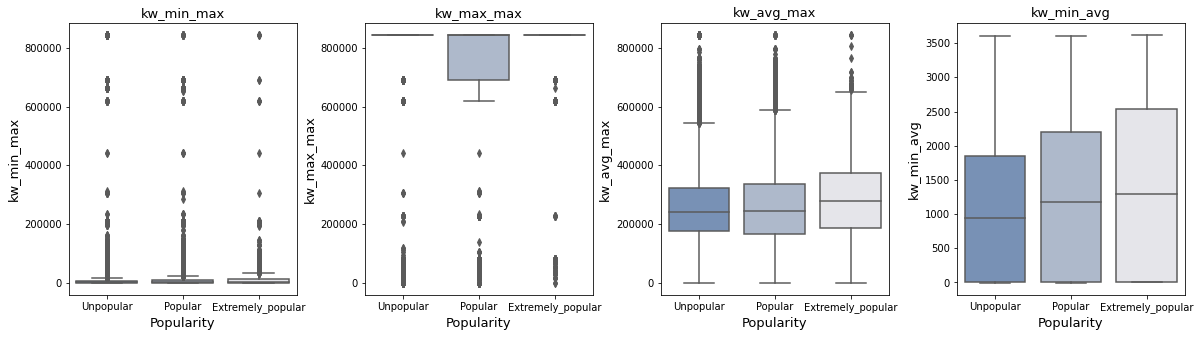

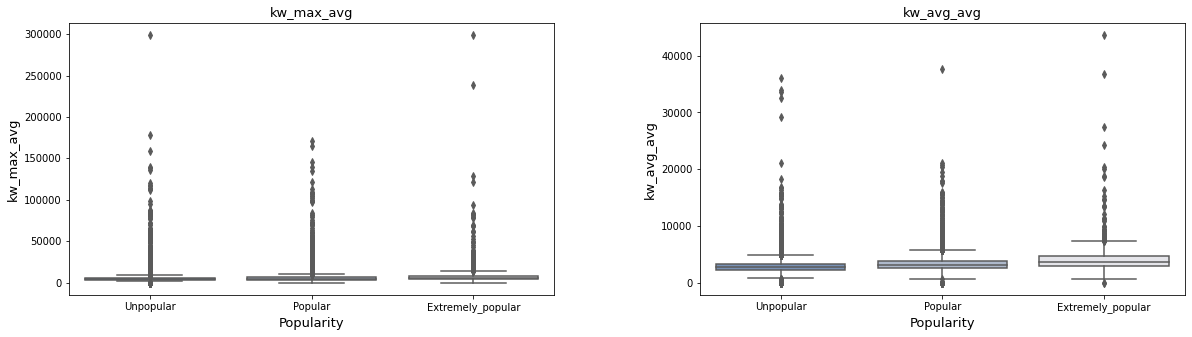

In [30]:
fig31 = visualize_numeric(keywords_1)
fig32 = visualize_numeric(keywords_2)   
fig33 = visualize_numeric(keywords_3)   
fig34 = visualize_numeric(keywords_4)

fig31.savefig('figures/fig31', transparent=True)
fig32.savefig('figures/fig32', transparent=True)
fig33.savefig('figures/fig33', transparent=True)
fig34.savefig('figures/fig34', transparent=True)


In [32]:
nlp = ['self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']
nlp_1 = ['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']
nlp_2 = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
nlp_3 = ['global_subjectivity', 'global_sentiment_polarity',
         'global_rate_positive_words', 'global_rate_negative_words']
nlp_4 = ['rate_negative_words', 'avg_positive_polarity','avg_negative_polarity']
nlp_5 = ['min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity','max_negative_polarity']
nlp_6 = ['title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

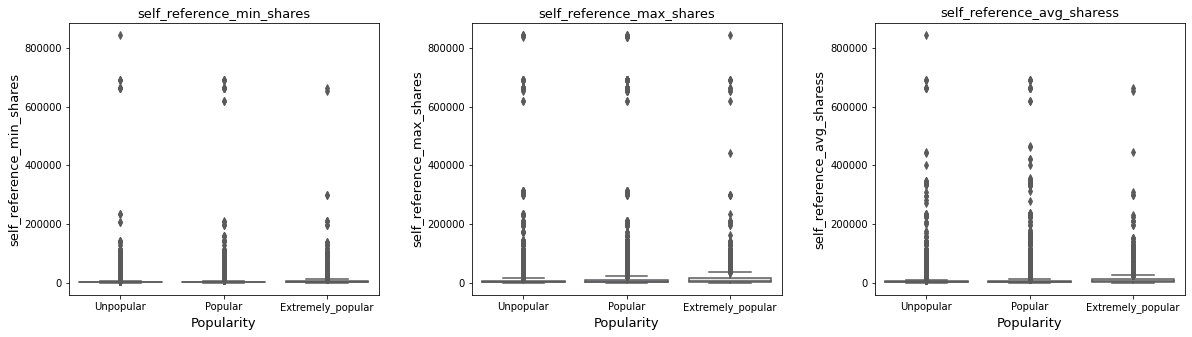

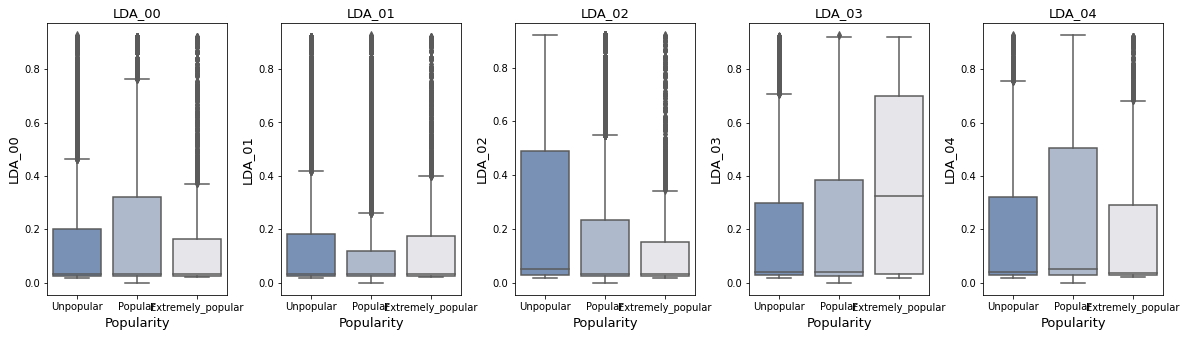

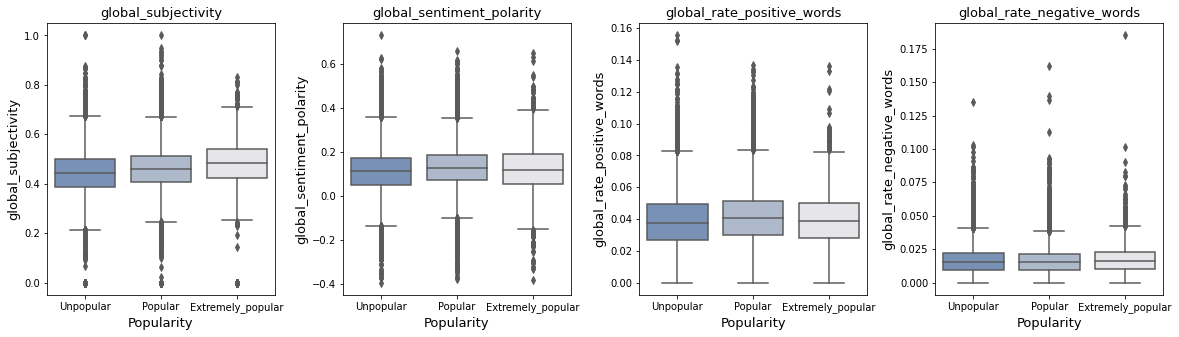

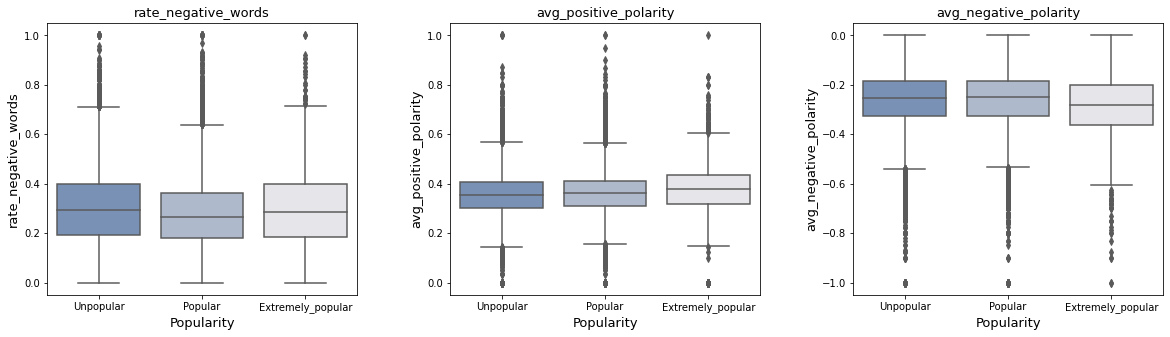

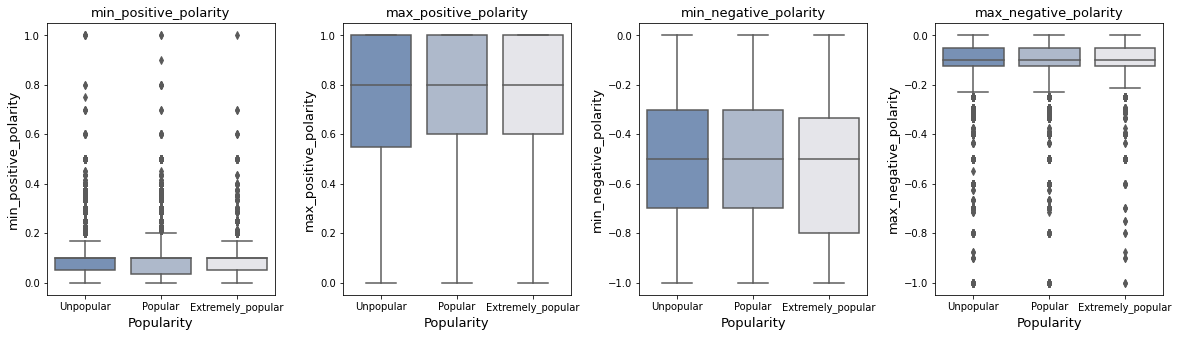

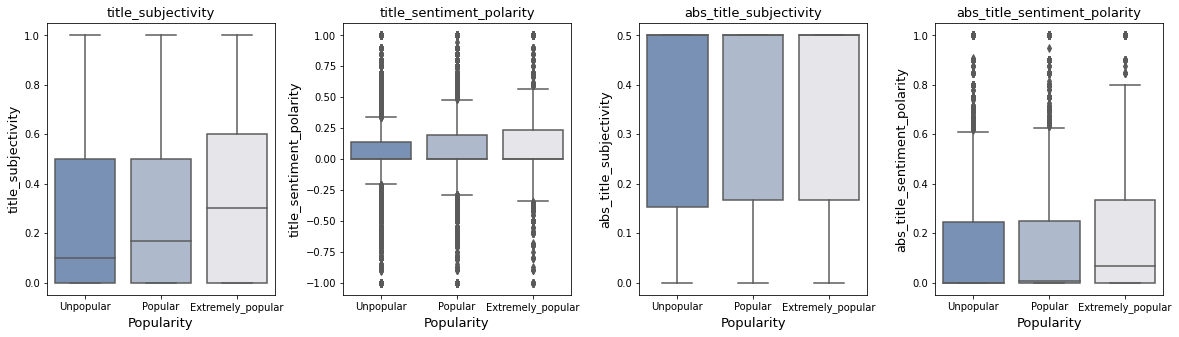

In [33]:
fig41 = visualize_numeric(nlp_1)
fig42 = visualize_numeric(nlp_2)
fig43 = visualize_numeric(nlp_3)
fig44 = visualize_numeric(nlp_4)
fig45 = visualize_numeric(nlp_5)
fig46 = visualize_numeric(nlp_6)

fig41.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig41', transparent=True)
fig42.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig42', transparent=True)
fig43.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig43', transparent=True)
fig44.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig44', transparent=True)
fig45.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig45', transparent=True)
fig46.savefig('/Users/chenyiqiu/Desktop/Semester 2/BT5151/Assignment 2/选题/figures/fig46', transparent=True)

### Categorical

In [34]:
categorical.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [35]:
week_day = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']
data_channel = ['data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
publish_day = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend']

# Merging the weekdays columns channels as one single column
publishdayMerge=data[week_day]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=data[data_channel]

#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [36]:
# merge the the new data into the dataframe
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='data_channel', value=DataChannel_arr)

In [37]:
category = ['is_weekend','weekdays','data_channel']

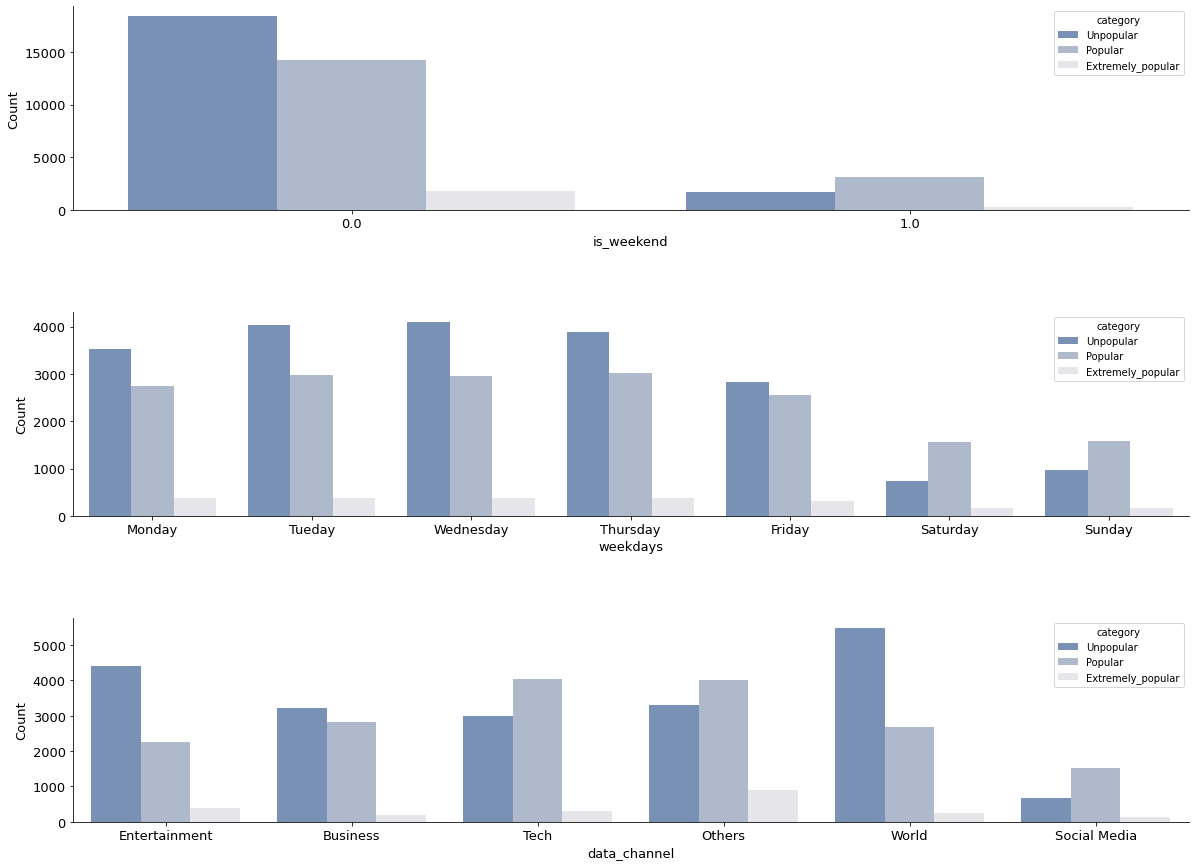

In [38]:
# visualize categorical variables
fig5 = plt.figure(figsize=(20,15))
grid = plt.GridSpec(nrows=3,ncols=1,wspace=0.2,hspace=0.5)

for j in range(len(category)):
    plt.subplot(grid[j,0])
    ax = sns.countplot(x = category[j], data = data, hue = 'category', palette = sns.color_palette("vlag"))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
    ax.tick_params(axis='y',labelsize=13)
    ax.tick_params(axis='x',labelsize=13)
    ax.set_xlabel(category[j], fontsize=13)
    ax.set_ylabel('Count',fontsize=13)
    sns.despine()

In [39]:
fig5.savefig('figures/fig5', transparent=True)